In [1]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:49<00:00, 23.6MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.1MB/s]


# New Section

In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D,Flatten , MaxPooling2D , Dense,Dropout,BatchNormalization
from keras import Sequential

In [5]:
# Generators

train_ds=keras.utils.image_dataset_from_directory(
directory='/content/train',
labels='inferred',
label_mode='int',
batch_size=32,
image_size=(256,256))

Found 20000 files belonging to 2 classes.


In [6]:
validation_ds=keras.utils.image_dataset_from_directory(
directory='/content/test',
labels='inferred',
label_mode='int',
batch_size=32,
image_size=(256,256))

Found 5000 files belonging to 2 classes.


In [7]:
def process(image,label):
    image=tf.cast(image/255,tf.float32)
    return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [8]:
# create CNN model
# 3 convolution layers

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [10]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 83s 117ms/step - loss: 1.4409 - accuracy: 0.5912 - val_loss: 4.3998 - val_accuracy: 0.5436
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5847 - accuracy: 0.6995 - val_loss: 0.5859 - val_accuracy: 0.6884
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5133 - accuracy: 0.7502 - val_loss: 0.6067 - val_accuracy: 0.7092
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4336 - accuracy: 0.7990 - val_loss: 0.4305 - val_accuracy: 0.7982
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3736 - accuracy: 0.8317 - val_loss: 0.9789 - val_accuracy: 0.6400
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3034 - accuracy: 0.8680 - val_loss: 0.8025 - val_accuracy: 0.7272
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2181 - accuracy: 0.9095 - val_loss: 0.6255 - val_ac

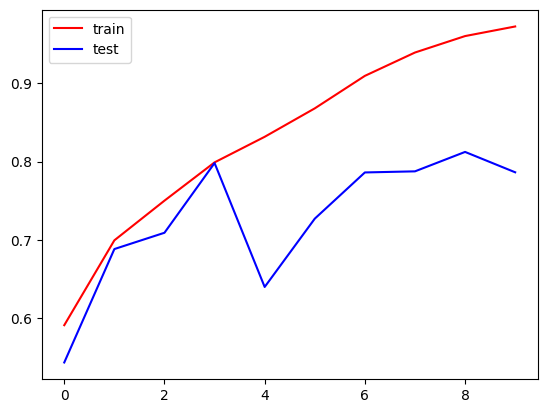

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

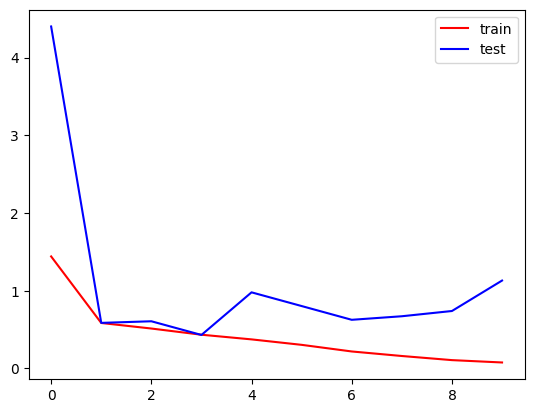

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

In [ ]:
# overfitting resolution

1/1 [==============================] - 0s 321ms/step


array([[1.]], dtype=float32)

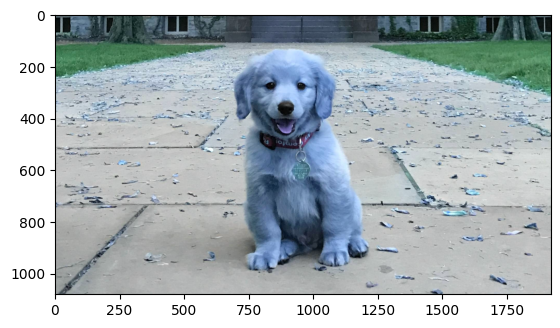

In [13]:
import cv2
img=cv2.imread('/content/doggy.jpg')
import matplotlib.pyplot
plt.imshow(img)
img=cv2.resize(img,(256,256))
img=img.reshape(1,256,256,3)
model.predict(img)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)

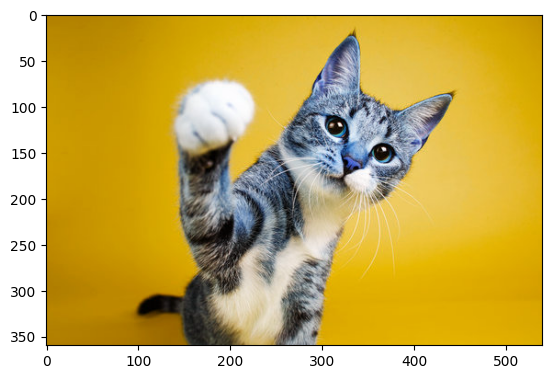

In [14]:
import cv2
img=cv2.imread('/content/catty.jpg')
import matplotlib.pyplot
plt.imshow(img)
img=cv2.resize(img,(256,256))
img=img.reshape(1,256,256,3)
model.predict(img)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

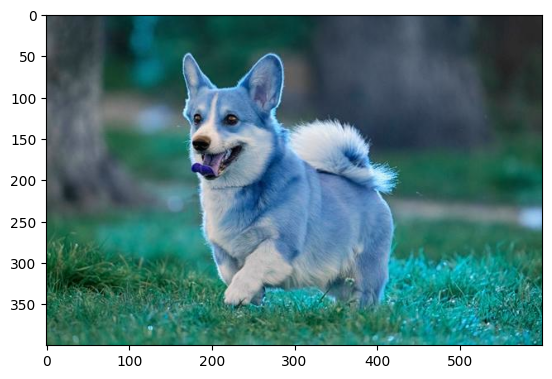

In [16]:
import cv2
img=cv2.imread('/content/dog.jpg')
import matplotlib.pyplot
plt.imshow(img)
img=cv2.resize(img,(256,256))
img=img.reshape(1,256,256,3)
model.predict(img)